In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [58]:
#입력 데이터
X_train = np.array([10,22,28,42,50])
X_train_mean = np.mean(X_train)
#출력 데이터
y_train = np.array([12,8,7,5,2])

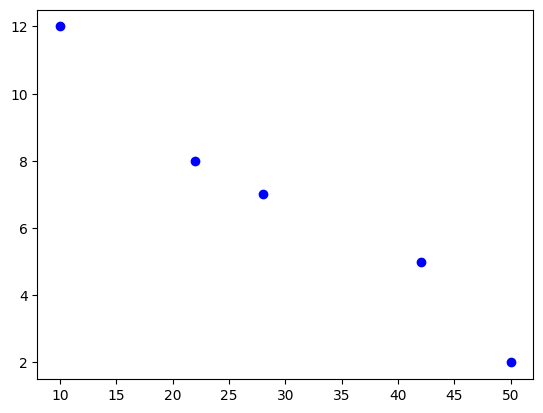

In [39]:
#산포도
plt.scatter(X_train,y_train,color='b')
plt.show()

In [40]:
#상관계수
np.corrcoef(X_train, y_train)

array([[ 1.        , -0.98385194],
       [-0.98385194,  1.        ]])

In [41]:
#2차원 배열로 바꾸기
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1) # reshape의 행 자리에 -1을 넣으면 데이터 수에 따라 자동 결정됨

print(X_train)
print(y_train)

[[10]
 [22]
 [28]
 [42]
 [50]]
[[12]
 [ 8]
 [ 7]
 [ 5]
 [ 2]]


In [42]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train = scalerX.transform(X_train)
print(X_train)

scalerY = StandardScaler()
scalerY.fit(y_train)
y_train = scalerY.transform(y_train)
print(y_train)

[[-1.43448707]
 [-0.59067115]
 [-0.16876319]
 [ 0.81568873]
 [ 1.37823268]]
[[ 1.57071744]
 [ 0.36247326]
 [ 0.06041221]
 [-0.54370988]
 [-1.44989302]]


In [43]:
#초기값 설정
a = -0.9513
t = 0.4
b = 1.2

In [44]:
# 기울기 구하기
y_a1 = 2 * (a * X_train + b - y_train)
print(y_a1)

[[1.98782022]
 [2.79886441]
 [2.60026442]
 [1.93549039]
 [2.67756055]]


In [45]:
# 기울기의 평균값 구하기
y_a1_mean = np.mean(y_a1)
print(y_a1_mean)

2.3999999999999995


In [46]:
# y_a1_mean > t 이므로 b 값 수정
b1 = b - t * y_a1_mean
print(b1)

0.2400000000000001


In [55]:
# y_a1_mean > t 이므로 b 값 수정
b1 = b - t * y_a1_mean
print("y절편 :", b1)

# 기울기 구하기
y_a2 = 2 * (a * X_train + b1 - y_train)

# 기울기의 평균값 구하기
y_a2_mean = np.mean(y_a2)
print("기울기 평균 :", y_a2_mean)

y절편 : 0.2400000000000001
기울기 평균 : 0.47999999999999987


In [56]:
# y_a2_mean > t 이므로 b 값 수정
b2 = b1 - t * y_a2_mean
print("y절편 :",b2)

# 기울기 구하기
y_a3 = 2 * (a * X_train + b2 - y_train)

# 기울기의 평균값 구하기
y_a3_mean = np.mean(y_a3)
print("기울기 평균 :", y_a3_mean)

y절편 : 0.048000000000000154
기울기 평균 : 0.09600000000000004


In [60]:
# y_a3_mean < t 이므로 학습 종료